In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Lendo todo o banco de dados:
dfClientes = pd.read_excel('caso_estudo.xlsx', sheet_name = 'clientes')
dfLojas = pd.read_excel('caso_estudo.xlsx', sheet_name = 'lojas')
dfPagamentos = pd.read_excel('caso_estudo.xlsx', sheet_name = 'pagamentos')
dfProdutos = pd.read_excel('caso_estudo.xlsx', sheet_name = 'produtos')
dfVendas = pd.read_excel('caso_estudo.xlsx', sheet_name = 'vendas')
dfPromocao = pd.read_csv('caso_estudo_venda_promocao.csv', sep=";")

In [3]:
#Inserindo todos os dados da Aula12:
#Esse caso está substituindo os valores nulos por informações que são possíveis de rastrear depois:
dfClientes.loc[dfClientes.nome.isnull(),'nome'] = 'Sem Nome'
dfClientes.loc[dfClientes.sexo.isnull(),'sexo'] = 'O'
dfClientes.loc[dfClientes.dt_nasc.isnull(),'dt_nasc'] = '01/01/2020'

#Formato das datas:
dfClientes.dt_nasc = pd.to_datetime(dfClientes.dt_nasc, format = '%m/%d/%Y')

#Manipulando um valor específico de um produto, feito na Aula11:
#Manipulando o valor do produto 'xxx-231a' para chegar em um valor real:
dfProdutos.loc[9, 'valor'] = dfProdutos.valor[9]/10000
dfProdutos
#Indexes feitos na Aula11:
dfClientes = dfClientes.set_index('id')
dfLojas = dfLojas.set_index('id')
dfProdutos = dfProdutos.set_index('id')
dfVendas = dfVendas.set_index('id')
dfPagamentos = dfPagamentos.set_index('id')
dfPromocao = dfPromocao.set_index('id_venda')

#Joins feitos na Aula12:
df = dfVendas.join(dfClientes.add_prefix('cliente_'), on = 'id_cliente')
df = df.join(dfLojas.add_prefix('loja_'), on = 'id_loja')
df = df.join(dfProdutos.add_prefix('produto_'), on = 'id_produto')
df = df.join(dfPagamentos.set_index('id_venda'))
df = df.join(dfPromocao)

#Inserindo Colunas feitas na Aula13:
#Inserindo uma coluna para quando ouve algum pagamento, caso a data do pagamento('dt_pgto') for nula('NaT') será representada como 0 para não feita:
df['pg'] = 1
df.loc[df.dt_pgto.isnull(), 'pg'] = 0
#Inserindo mais uma coluna: Tempo de pagamento em dias:
df['tempo_pg'] = (df.dt_pgto - df.dt_venda).dt.days
#Inserindo a coluna 'idade':
df['cliente_idade'] = np.floor((pd.to_datetime('today').normalize() - pd.to_datetime(df['cliente_dt_nasc'])).dt.days / 365.25)

#Dando print:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,promoção,pg,tempo_pg,cliente_idade
id,,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,0,1,20.0,74.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,1,44.0,52.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,1,41.0,62.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,0,NaN,82.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,0,1,18.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,0,1,20.0,24.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,0,1,5.0,30.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,0,NaN,38.0


# Análise de Inadimplência
## Inadimplência por Loja

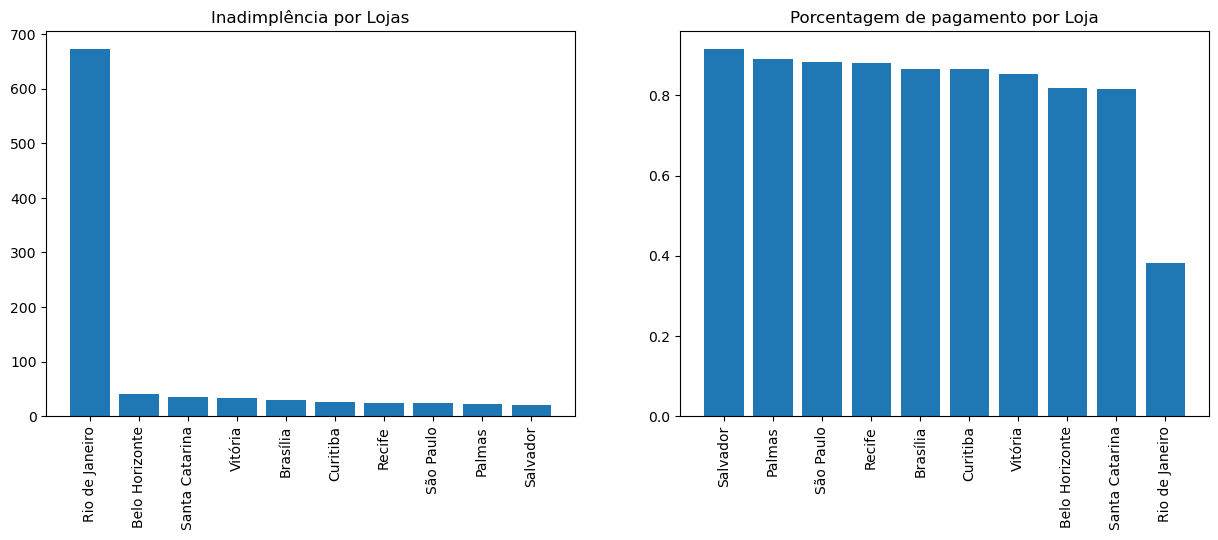

In [5]:
#'pg' - Casos de Indimplência:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
graf_dados = df[df.pg==0].groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Inadimplência por Lojas')
plt.xticks(rotation=90)


#O erro ocorre porque o código está tentando calcular a média (mean) de uma coluna que contém valores não numéricos. Isso é causado pelo fato de que o groupby tenta
#calcular a média para todas as colunas, incluindo aquelas que não são numéricas. Para corrigir isso, você pode especificar explicitamente a coluna que deseja calcular
#a média, ou garantir que apenas colunas numéricas sejam incluídas no cálculo da média. Abaixo está uma versão corrigida do seu código:

#antes:'graf_dados = df.groupby('loja_cidade')mean().pg.sort_values(ascending=False)'
#depois:'graf_dados = df.groupby('loja_cidade')['pg'].mean().sort_values(ascending=False)' -dessa maneira ele só calcula a média do 'pg'!
plt.subplot(1,2,2)
graf_dados = df.groupby('loja_cidade')['pg'].mean().sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Porcentagem de pagamento por Loja')
plt.xticks(rotation=90)

plt.show()

## Inadimplência por Produto

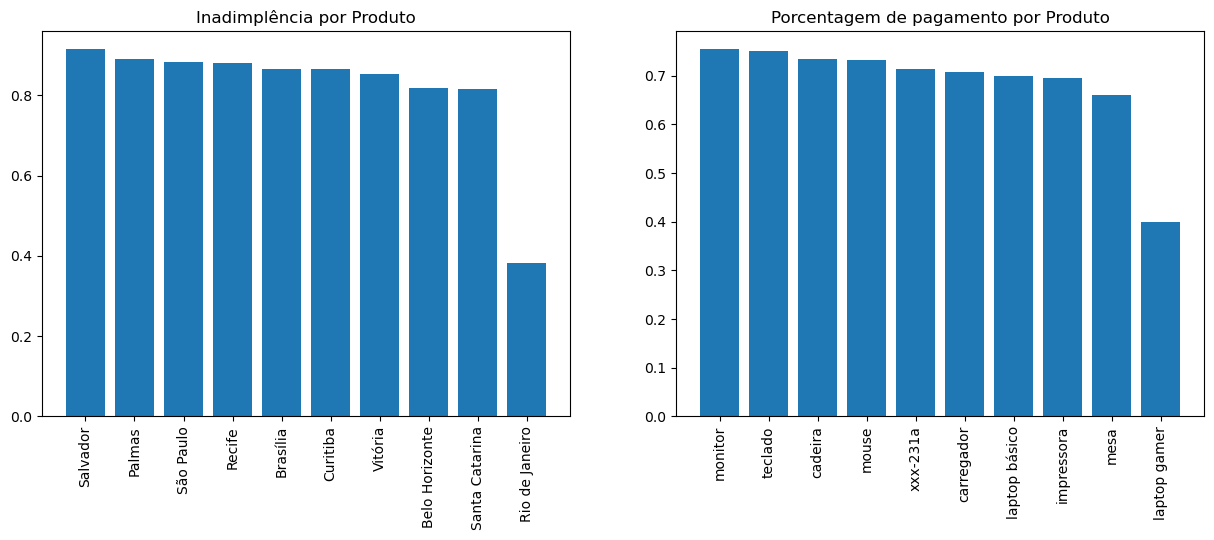

In [7]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
df[df.pg == 0].groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Inadimplência por Produto')

plt.subplot(1,2,2)
graf_dados = df.groupby('produto_produto')['pg'].mean().sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Porcentagem de pagamento por Produto')
plt.xticks(rotation=90)


plt.show()

In [8]:
graf_dados = df[['cliente_idade', 'pg']].groupby('cliente_idade').mean().sort_values('cliente_idade')#a média cria a porcentagem...
graf_dados

,pg
cliente_idade,
4.0,0.200000
20.0,0.866667
21.0,0.640000
22.0,0.707317
23.0,0.720930
...,...
85.0,0.480000
86.0,0.666667
87.0,0.595238


Text(0.5, 1.0, 'Inadimplência por Idade')

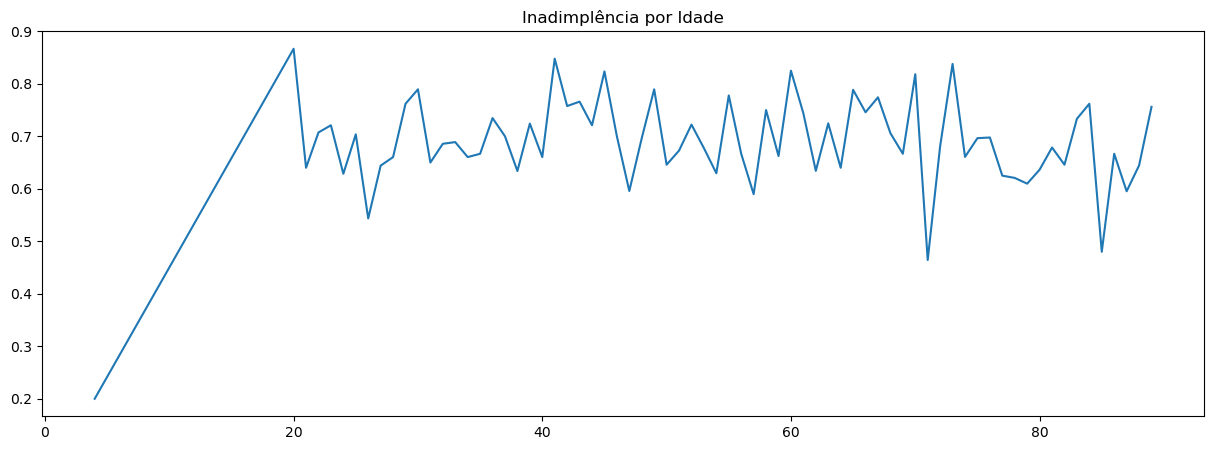

In [9]:
plt.figure(figsize = (15,5))
plt.plot(graf_dados.index, graf_dados.values)
plt.title('Inadimplência por Idade')

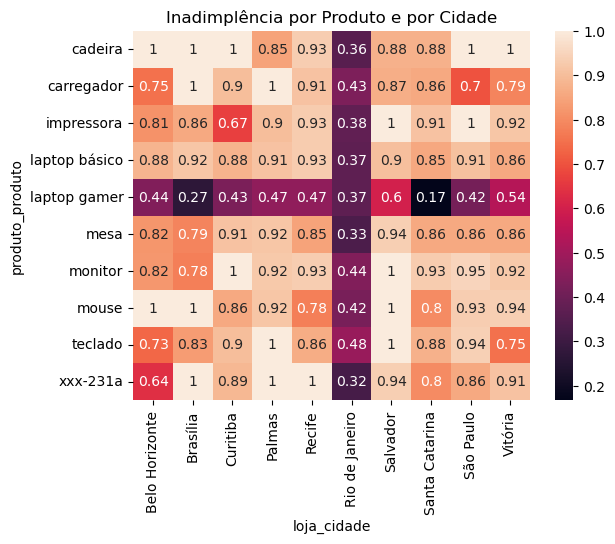

In [25]:
graf_dados = df.pivot_table(index = 'produto_produto', columns = 'loja_cidade', values = 'pg', aggfunc = 'mean')
plt.title('Inadimplência por Produto e por Cidade')
sns.heatmap(graf_dados, annot = True) #'annot' mostra a porcentagem encontrada dentro dos quadradinhos...
plt.show()